<a href="https://colab.research.google.com/github/aysharega/M.Tech-Project-Thesis/blob/main/Transfer_Learning_Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning Inception V3 using Keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/dataset1/train'
valid_path = '/content/drive/MyDrive/Datasets/dataset1/validation'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87924736/87910968 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Datasets/dataset1/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5600 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset1/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 75 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
175/175 [==============================] - 836s 5s/step - loss: 0.1659 - accuracy: 0.9771 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
175/175 [==============================] - 97s 553ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
175/175 [==============================] - 96s 546ms/step - loss: 1.0878e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
175/175 [==============================] - 96s 546ms/step - loss: 8.1390e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
175/175 [==============================] - 96s 546ms/step - loss: 4.6318e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
175/175 [==============================] - 97s 551ms/step - loss: 7.8443e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
175/175 [==============================] - 94s 537ms/step - loss: 4.9425e-07 - ac

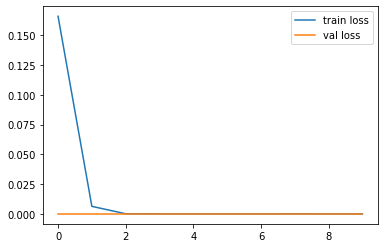

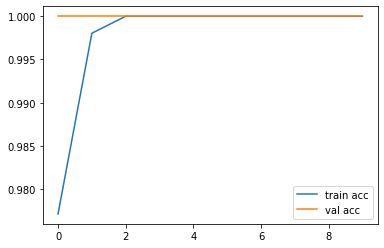

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[2.86797130e-21, 4.00785970e-20, 1.00000000e+00],
       [1.00000000e+00, 2.48009401e-19, 4.63553173e-18],
       [1.00000000e+00, 1.12053944e-25, 3.21648272e-24],
       [1.00000000e+00, 2.00767596e-26, 4.21761032e-25],
       [6.06228987e-19, 1.00000000e+00, 9.64428859e-21],
       [1.86704242e-22, 1.00000000e+00, 1.48170215e-24],
       [1.00000000e+00, 5.51245992e-25, 4.98473507e-23],
       [1.00000000e+00, 1.78762863e-24, 6.35083831e-23],
       [7.84830134e-26, 1.00000000e+00, 3.91988674e-29],
       [1.00000000e+00, 1.56089379e-16, 1.56111415e-16],
       [3.45623568e-13, 1.79065240e-16, 1.00000000e+00],
       [1.00000000e+00, 1.43603066e-27, 1.42021774e-24],
       [3.92888969e-26, 1.00000000e+00, 3.82963767e-29],
       [3.40824619e-27, 1.79086234e-33, 1.00000000e+00],
       [6.82158977e-17, 1.00000000e+00, 2.76787941e-23],
       [2.03258558e-15, 2.90449939e-23, 1.00000000e+00],
       [1.22628365e-28, 0.00000000e+00, 1.00000000e+00],
       [8.50474760e-16, 1.55531

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0,
       0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 1,
       1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0,
       0, 1, 1, 0, 1, 1, 2, 2, 1])

In [22]:
# Libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries and modules for Machine Learning
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# Libraries and modules for model evaluation
from sklearn.metrics import confusion_matrix, classification_report